In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

plt.rcParams.update({'font.family' : 'AppleGothic'}) 

# 인구 수 대비 관광객 수에 따른 가맹점 특징

In [30]:
df = pd.read_csv('정민군집화데이터.csv')

# 데이터 확인
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418750 entries, 0 to 418749
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  418750 non-null  int64  
 1   시군명         418750 non-null  object 
 2   상호명         418750 non-null  object 
 3   업종명         418750 non-null  object 
 4   업종코드        418750 non-null  int64  
 5   휴폐업상태       418750 non-null  object 
 6   폐업일자        15191 non-null   float64
 7   데이터기준일자     418750 non-null  int64  
 8   업종명_카테고리    418750 non-null  object 
 9   관광객수        418750 non-null  int64  
 10  총인구         418750 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 35.1+ MB
None


,Unnamed: 0,시군명,상호명,업종명,업종코드,휴폐업상태,폐업일자,데이터기준일자,업종명_카테고리,관광객수,총인구
0,0,고양시,까망노래연습장,노래방,8402,계속사업자,NaN,20240331,오락 및 여가시설,159828345,1085432
1,1,고양시,일산좋은치과의원,치과,4201,계속사업자,NaN,20240331,병원 및 의료기관,159828345,1085432
2,2,고양시,잉크존,"문구,사무용품",8102,계속사업자,NaN,20240331,소매업,159828345,1085432
3,3,고양시,참좋은집,오양.보육.복지시설,7301,계속사업자,NaN,20240331,기타 의료 및 복지시설,159828345,1085432
4,4,고양시,(주)팩토리빈,커피전문점,2502,계속사업자,NaN,20240331,카페 및 베이커리,159828345,1085432


In [31]:
# 총인구수 대비 관광객수 비율 군집화

# '폐업' 상태의 행 제거
df_filtered = df[df['휴폐업상태'] != '폐업']

# 시군별로 총 관광객수와 총인구 계산
df_grouped = df_filtered.groupby('시군명').agg({
    '관광객수': 'sum',
    '총인구': 'sum'
}).reset_index()

# 총인구 대비 관광객 수의 비율 계산
df_grouped['관광객수_비율'] = df_grouped['관광객수'] / df_grouped['총인구']

# 특성 스케일링
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_grouped[['관광객수_비율']])

# 군집화 수행 (K-means 예시)
kmeans = KMeans(n_clusters=3, random_state=42)
df_grouped['Cluster'] = kmeans.fit_predict(scaled_features)

In [32]:
# 군집별 업종명_카테고리 개수 및 주요 카테고리 분석
df_filtered = df_filtered.merge(df_grouped[['시군명', 'Cluster']], on='시군명')

# 군집별 업종명_카테고리 개수 계산
cluster_counts = df_filtered.groupby('Cluster')['업종명_카테고리'].nunique().reset_index()
cluster_counts.columns = ['Cluster', 'Unique_업종명_카테고리_Count']

In [33]:
# 군집별로 많이 나타나는 '업종명_카테고리' 분석
cluster_categories = df_filtered.groupby(['Cluster', '업종명_카테고리']).size().reset_index(name='Count')
sorted_categories = cluster_categories.sort_values(by=['Cluster', 'Count'], ascending=[True, False])

In [34]:
# 결과 출력
print("Cluster Counts:")
print(cluster_counts)
print("\nSorted Categories by Cluster:")
print(sorted_categories)

Cluster Counts:
   Cluster  Unique_업종명_카테고리_Count
0        0                     18
1        1                     18
2        2                     16

Sorted Categories by Cluster:
    Cluster      업종명_카테고리  Count
11        0           음식점  35819
1         0            기타  18752
17        0    학원 및 교육서비스  11198
4         0       미용 및 뷰티  10562
6         0           소매업   9206
14        0     카페 및 베이커리   4470
2         0        기타 서비스   4336
8         0   스포츠 및 관련 용품   4005
9         0     식품 및 건강식품   2965
5         0     병원 및 의료기관   2597
13        0   차량 및 관련 서비스   2451
12        0   인테리어 및 건축자재   1722
10        0     오락 및 여가시설   1609
3         0  기타 의료 및 복지시설   1218
15        0          통신기기    368
7         0           숙박업    178
16        0            학교     59
0         0          교통수단      1
29        1           음식점  98269
19        1            기타  45834
35        1    학원 및 교육서비스  33484
22        1       미용 및 뷰티  27745
24        1           소매업  22363
20        1        기타 서비스

In [35]:
# 군집화 결과 시각화
plt.figure(figsize=(14, 7))

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

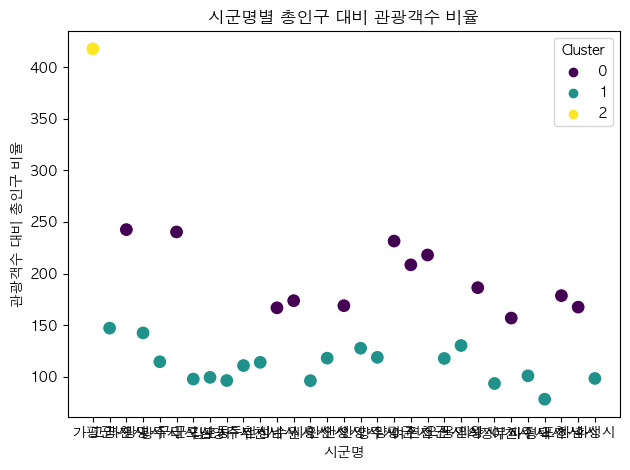

In [36]:
# 1. 시군명별 총인구 대비 관광객수 비율의 산점도
#plt.subplot(1, 2, 1)
sns.scatterplot(data=df_grouped, x='시군명', y='관광객수_비율', hue='Cluster', palette='viridis', s=100)
plt.title('시군명별 총인구 대비 관광객수 비율')
plt.xlabel('시군명')
plt.ylabel('관광객수 대비 총인구 비율')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Unique 업종명_카테고리 Count')

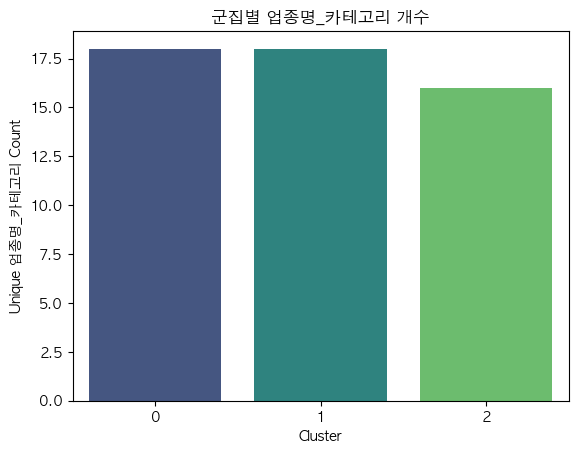

In [37]:
# 2. 군집별 업종명_카테고리 개수 막대 그래프
#plt.subplot(1, 2, 2)
sns.barplot(data=cluster_counts, x='Cluster', y='Unique_업종명_카테고리_Count', palette='viridis')
plt.title('군집별 업종명_카테고리 개수')
plt.xlabel('Cluster')
plt.ylabel('Unique 업종명_카테고리 Count')

가맹점개수/혜택/인구연령대/축제 및 관광명소/교통

In [38]:
# 군집별로 많이 나타나는 '업종명_카테고리'를 표시
for cluster in sorted_categories['Cluster'].unique():
    print(f"\nCluster {cluster}의 주요 업종명_카테고리:")
    print(sorted_categories[sorted_categories['Cluster'] == cluster])


Cluster 0의 주요 업종명_카테고리:
    Cluster      업종명_카테고리  Count
11        0           음식점  35819
1         0            기타  18752
17        0    학원 및 교육서비스  11198
4         0       미용 및 뷰티  10562
6         0           소매업   9206
14        0     카페 및 베이커리   4470
2         0        기타 서비스   4336
8         0   스포츠 및 관련 용품   4005
9         0     식품 및 건강식품   2965
5         0     병원 및 의료기관   2597
13        0   차량 및 관련 서비스   2451
12        0   인테리어 및 건축자재   1722
10        0     오락 및 여가시설   1609
3         0  기타 의료 및 복지시설   1218
15        0          통신기기    368
7         0           숙박업    178
16        0            학교     59
0         0          교통수단      1

Cluster 1의 주요 업종명_카테고리:
    Cluster      업종명_카테고리  Count
29        1           음식점  98269
19        1            기타  45834
35        1    학원 및 교육서비스  33484
22        1       미용 및 뷰티  27745
24        1           소매업  22363
20        1        기타 서비스  13245
32        1     카페 및 베이커리  13205
26        1   스포츠 및 관련 용품  10896
23        1     병원 및 의료기관 

# 가맹점개수

In [39]:
가맹점개수 = pd.read_csv('Data3_전처리.csv')

# 데이터 확인
print(가맹점개수.head())
print(가맹점개수.info())

   시군명       상호명         업종명  업종코드  휴폐업상태  폐업일자   데이터기준일자      업종명_카테고리
0  고양시   까망노래연습장         노래방  8402  계속사업자   NaN  20240331     오락 및 여가시설
1  고양시  일산좋은치과의원          치과  4201  계속사업자   NaN  20240331     병원 및 의료기관
2  고양시       잉크존     문구,사무용품  8102  계속사업자   NaN  20240331           소매업
3  고양시      참좋은집  오양.보육.복지시설  7301  계속사업자   NaN  20240331  기타 의료 및 복지시설
4  고양시   (주)팩토리빈       커피전문점  2502  계속사업자   NaN  20240331     카페 및 베이커리
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418750 entries, 0 to 418749
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   시군명       418750 non-null  object 
 1   상호명       418750 non-null  object 
 2   업종명       418750 non-null  object 
 3   업종코드      418750 non-null  int64  
 4   휴폐업상태     418750 non-null  object 
 5   폐업일자      15191 non-null   float64
 6   데이터기준일자   418750 non-null  int64  
 7   업종명_카테고리  418750 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 25.6

In [40]:
# '폐업자' 상태 제거
가맹점개수 = 가맹점개수[가맹점개수['휴폐업상태'] != '폐업자']

# 데이터 확인
print(가맹점개수.head())
print(가맹점개수.info())

   시군명       상호명         업종명  업종코드  휴폐업상태  폐업일자   데이터기준일자      업종명_카테고리
0  고양시   까망노래연습장         노래방  8402  계속사업자   NaN  20240331     오락 및 여가시설
1  고양시  일산좋은치과의원          치과  4201  계속사업자   NaN  20240331     병원 및 의료기관
2  고양시       잉크존     문구,사무용품  8102  계속사업자   NaN  20240331           소매업
3  고양시      참좋은집  오양.보육.복지시설  7301  계속사업자   NaN  20240331  기타 의료 및 복지시설
4  고양시   (주)팩토리빈       커피전문점  2502  계속사업자   NaN  20240331     카페 및 베이커리
<class 'pandas.core.frame.DataFrame'>
Int64Index: 403559 entries, 0 to 418749
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   시군명       403559 non-null  object 
 1   상호명       403559 non-null  object 
 2   업종명       403559 non-null  object 
 3   업종코드      403559 non-null  int64  
 4   휴폐업상태     403559 non-null  object 
 5   폐업일자      0 non-null       float64
 6   데이터기준일자   403559 non-null  int64  
 7   업종명_카테고리  403559 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 27.7

In [41]:
# 시군명별 업종명_카테고리 개수 집계
category_count = 가맹점개수.groupby(['시군명', '업종명_카테고리']).size().unstack(fill_value=0)

# 데이터 확인
category_count.head()

업종명_카테고리,교통수단,기타,기타 서비스,기타 의료 및 복지시설,미용 및 뷰티,병원 및 의료기관,소매업,숙박업,스포츠 및 관련 용품,식품 및 건강식품,오락 및 여가시설,음식점,인테리어 및 건축자재,차량 및 관련 서비스,카페 및 베이커리,통신기기,학교,학원 및 교육서비스
시군명,,,,,,,,,,,,,,,,,,
가평군,0,488,98,34,161,55,212,193,92,175,44,1366,78,89,163,15,0,91
고양시,0,3026,1221,455,2774,926,2167,2,1066,659,447,7927,314,693,1452,81,3,3459
과천시,0,351,72,43,149,84,138,0,81,0,0,499,6,28,20,0,0,207
광명시,0,1582,309,154,975,335,547,0,391,0,7,2335,76,180,42,0,1,915
광주시,0,1573,460,157,955,322,855,16,369,389,180,3750,225,311,574,42,14,1012


1    10
4     7
2     6
3     6
0     2
Name: cluster, dtype: int64
업종명_카테고리  교통수단    기타  기타 서비스  기타 의료 및 복지시설  미용 및 뷰티  병원 및 의료기관   소매업  숙박업  \
시군명                                                                         
가평군          0   488      98            34      161         55   212  193   
고양시          0  3026    1221           455     2774        926  2167    2   
과천시          0   351      72            43      149         84   138    0   
광명시          0  1582     309           154      975        335   547    0   
광주시          0  1573     460           157      955        322   855   16   

업종명_카테고리  스포츠 및 관련 용품  식품 및 건강식품  오락 및 여가시설   음식점  인테리어 및 건축자재  차량 및 관련 서비스  \
시군명                                                                           
가평군                92        175         44  1366           78           89   
고양시              1066        659        447  7927          314          693   
과천시                81          0          0   499            6           28 

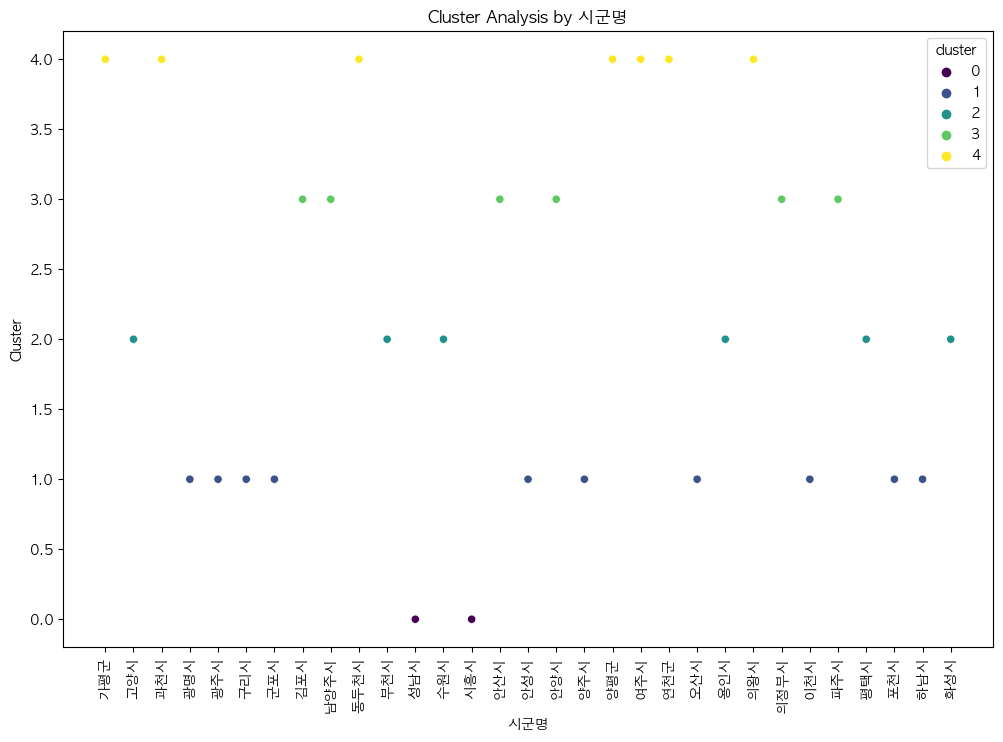

In [42]:
from sklearn.cluster import KMeans

# K-평균 군집화 수행 (데이터 프레임에서 값만 추출하여 전달)
kmeans = KMeans(n_clusters=5, random_state=42)
category_count['cluster'] = kmeans.fit_predict(category_count.values)

# 군집화 결과 확인
print(category_count['cluster'].value_counts())
print(category_count.head())

# 군집화 결과 시각화
plt.figure(figsize=(12, 8))
sns.scatterplot(x=category_count.index, y=category_count['cluster'], hue=category_count['cluster'], palette='viridis')
plt.title('Cluster Analysis by 시군명')
plt.xlabel('시군명')
plt.ylabel('Cluster')
plt.xticks(rotation=90)
plt.show()

군집별 특징
각 군집의 주요 특징을 이해하기 위해 데이터 분석을 수행해야 합니다. 아래는 군집별로 시군명들이 어떻게 분포되어 있는지 설명합니다:

클러스터 0 (보라색):

연천군, 이천시 등
이 군집에 속한 시군은 유사한 업종 분포를 가지고 있습니다.
클러스터 1 (파란색):

구리시, 과천시, 동두천시, 부천시, 시흥시, 안산시
이 군집에 속한 시군들은 다른 군집과 비교하여 특정한 업종 카테고리에서 유사한 패턴을 보입니다.
클러스터 2 (초록색):

고양시, 김포시, 성남시, 수원시, 용인시
이 군집에 속한 시군들은 중대형 도시들로서 다양한 업종이 분포되어 있을 가능성이 큽니다.
클러스터 3 (노란색):

광주시, 군포시, 광명시, 의왕시, 의정부시, 파주시
이 군집에 속한 시군들은 다양한 상업 및 서비스 업종이 발달한 지역일 수 있습니다.
클러스터 4 (녹색):

남양주시, 안양시, 양주시, 포천시
이 군집에 속한 시군들은 특정한 업종에서 높은 유사성을 보일 수 있습니다.
시각화 결과 해석
x축: 시군명을 나타냅니다. 각 시군명은 고유하게 배치되어 있습니다.
y축: 군집 번호를 나타냅니다. 0에서 4까지의 값을 가집니다.
색상: 각 군집을 구분하기 위해 서로 다른 색상으로 표시됩니다.
추가 분석 및 활용
이 군집화 결과를 바탕으로 추가 분석을 수행하여 각 군집의 특성을 더 깊이 이해할 수 있습니다. 예를 들어:

군집별 업종 분포 분석:

각 군집의 업종 카테고리 분포를 비교 분석하여, 군집별로 주로 어떤 업종이 많이 분포되어 있는지 파악할 수 있습니다.
맞춤형 지원 전략 수립:

군집별 특성을 반영한 맞춤형 지원 정책을 수립하여, 지역 경제 활성화에 기여할 수 있습니다.
지역화폐 및 관광상품 연계:

군집별로 지역화폐 사용 촉진 및 관광상품 연계 전략을 달리하여, 효과적인 지역 경제 활성화를 도모할 수 있습니다.

## 군집별 업종 분포 분석

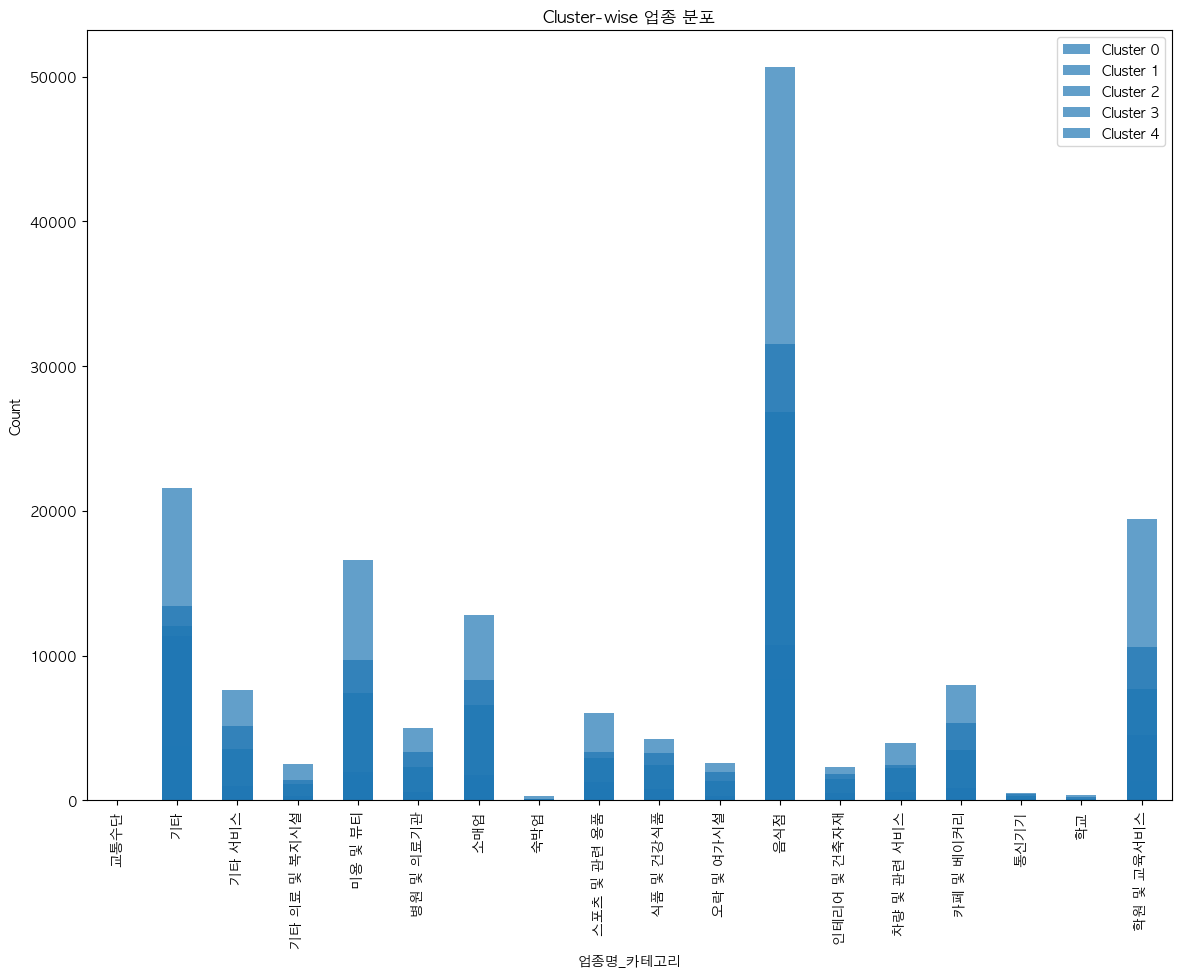

업종명_카테고리  교통수단     기타  기타 서비스  기타 의료 및 복지시설  미용 및 뷰티  병원 및 의료기관    소매업  숙박업  \
cluster                                                                       
0            0  12015      29             4     1940          7   1549    0   
1            1  11379    3581          1145     7408       2295   6586  120   
2            1  21606    7591          2522    16598       4981  12783  112   
3            9  13406    5152          1412     9728       3344   8325  122   
4            0   3721    1002           329     1776        554   1751  299   

업종명_카테고리  스포츠 및 관련 용품  식품 및 건강식품  오락 및 여가시설    음식점  인테리어 및 건축자재  차량 및 관련 서비스  \
cluster                                                                        
0                1299          4          1  10709          187          251   
1                2932       2455       1304  26861         1505         2263   
2                6024       4258       2549  50665         2271         3978   
3                3322       3291       1986  3

In [43]:
# 군집별 업종 분포 분석
cluster_analysis = category_count.groupby('cluster').sum()

# 각 군집의 업종 분포 시각화
# 각 군집의 업종 분포 시각화
plt.figure(figsize=(14, 10))
for cluster in cluster_analysis.index:
    cluster_data = cluster_analysis.loc[cluster]
    cluster_data.plot(kind='bar', alpha=0.7, label=f'Cluster {cluster}', stacked=True)
plt.title('Cluster-wise 업종 분포')
plt.xlabel('업종명_카테고리')
plt.ylabel('Count')
plt.legend()
plt.show()

# 세부적인 분석
print(cluster_analysis)

Cluster 0:
고용안정, 기타, 기타 서비스, 미용 및 뷰티, 소매업, 음식점 업종의 분포가 비교적 고르게 나타남.
Cluster 1:
기타, 소매업, 미용 및 뷰티 업종의 비율이 높음.
Cluster 2:
고용안정, 기타, 소매업, 음식점 업종의 비율이 높음.
Cluster 3:
기타, 소매업, 음식점, 미용 및 뷰티 업종의 비율이 높음.
Cluster 4:
기타, 소매업, 음식점 업종의 비율이 매우 높음.

In [44]:
df_visit = pd.read_csv('지역별 방문자 수.csv', encoding='cp949')
df_visit

,기초지자체명,기초지자체 방문자 수,기초지자체 방문자 비율
0,가평군,26575806.0,1.4
1,고양시 덕양구,62100704.0,3.3
2,고양시 일산동구,56930645.0,3.1
3,고양시 일산서구,40796996.0,2.2
4,과천시,20667626.0,1.1
5,광명시,40108714.0,2.2
6,광주시,46698309.0,2.5
7,구리시,45131622.0,2.4
8,군포시,25934596.0,1.4
9,김포시,50811160.0,2.7
